# 世界の最新の感染者数

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
del df["Lat"]
del df["Long"]

In [3]:
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728
1,NaN,Albania,0,0,0,0,0,0,0,0,...,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569
4,NaN,Angola,0,0,0,0,0,0,0,0,...,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441


In [4]:
latest_date = df.tail(1).columns[-1]
latest_date

'5/23/21'

In [5]:
latest_column_key = df.columns[-1]
df = df[['Province/State','Country/Region',latest_column_key]]
df = df.rename(columns={latest_column_key:"latest_confirmed"})
df.head()

,Province/State,Country/Region,latest_confirmed
0,NaN,Afghanistan,65728
1,NaN,Albania,132209
2,NaN,Algeria,126860
3,NaN,Andorra,13569
4,NaN,Angola,32441


## 全世界の最新の感染者数

In [6]:
print("全世界感染者数({}時点):{:,}人".format(latest_date,df["latest_confirmed"].sum()))

全世界感染者数(5/23/21時点):166,862,060人


## 国別の最新の感染者数

In [7]:
country = df.groupby(["Country/Region"],as_index=False).sum("latest_confirmed")
country = country.sort_values("latest_confirmed", ascending=False)

In [8]:
country.head()

,Country/Region,latest_confirmed
178,US,33117737
79,India,26752447
23,Brazil,16083258
62,France,5665101
177,Turkey,5186487


In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


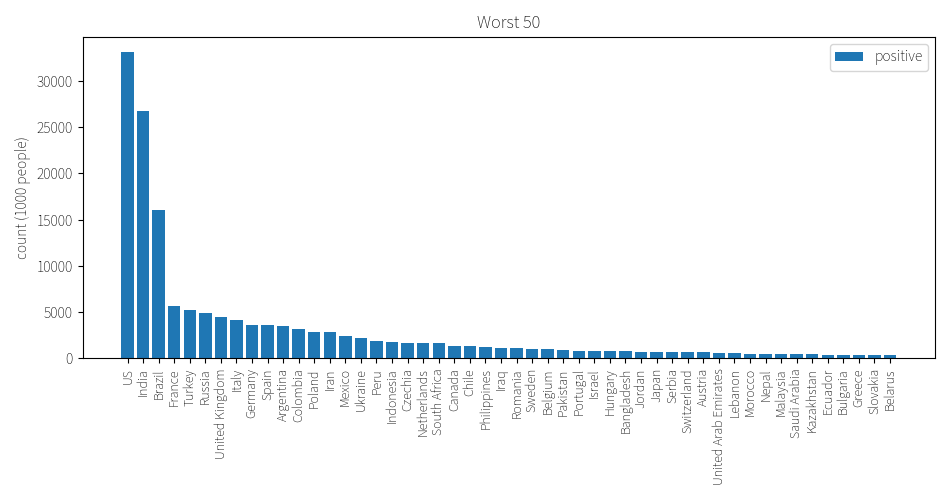

In [10]:
plt.figure(figsize=(9.5,5))
plt.title("Worst 50")
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("count (1000 people)")
#fig.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.bar(country.head(50)["Country/Region"],country.head(50)["latest_confirmed"]/1000,label="positive")
plt.legend()
plt.tight_layout()

## ヒストグラム 

<IPython.core.display.Javascript object>


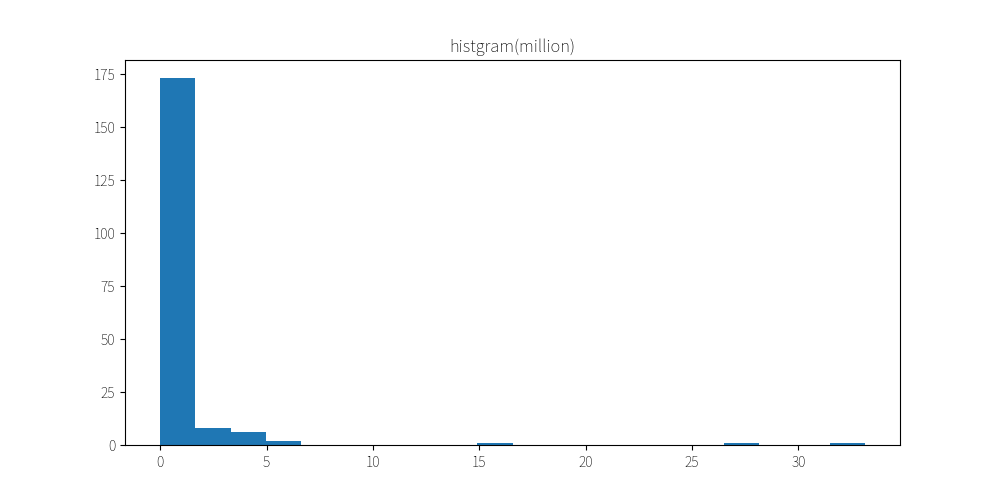

(array([173.,   8.,   6.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([1.00000000e-06, 1.65588780e+00, 3.31177460e+00, 4.96766140e+00,
        6.62354820e+00, 8.27943500e+00, 9.93532180e+00, 1.15912086e+01,
        1.32470954e+01, 1.49029822e+01, 1.65588690e+01, 1.82147558e+01,
        1.98706426e+01, 2.15265294e+01, 2.31824162e+01, 2.48383030e+01,
        2.64941898e+01, 2.81500766e+01, 2.98059634e+01, 3.14618502e+01,
        3.31177370e+01]),
 <a list of 20 Patch objects>)

In [11]:
plt.figure(figsize=(10,5))
plt.title("histgram(million)")
#plt.xticks(rotation="90",fontsize=9)
#plt.ylabel("count (1000 people)")
#fig.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.hist(country["latest_confirmed"]/1000000,bins=20)

## 人口当たりの分析

In [12]:
pop = pd.read_excel("world-data/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx",header=16)
pop.head(1)

,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Estimates,WORLD,NaN,900,World,0,2536431.018,2584034.227,2630861.69,...,7041194.168,7125827.957,7210582.041,7295290.759,7379796.967,7464021.934,7547858.9,7631091.113,7713468.205,7794798.729


In [13]:
pop.iloc[:,-1]

0      7794798.729
1              ...
2      1273304.261
3      6521494.468
4      1057438.163
          ...     
284         62.273
285      37742.157
286         56.772
287          5.795
288     331002.647
Name: 2020, Length: 289, dtype: object

In [14]:
pop_latest = pop.loc[pop["Type"]=="Country/Area"][[pop.columns[2],pop.columns[-1]]]

In [15]:
pop_latest.columns = ["country","population"]

In [16]:
pop_latest.head()

,country,population
26,Burundi,11890.781
27,Comoros,869.595
28,Djibouti,988.002
29,Eritrea,3546.427
30,Ethiopia,114963.583


In [17]:
country.head()

,Country/Region,latest_confirmed
178,US,33117737
79,India,26752447
23,Brazil,16083258
62,France,5665101
177,Turkey,5186487


### 世界全体での人口10万人あたり陽性者数

In [18]:
country.latest_confirmed.sum()

166862060

In [19]:
pop_latest.population.sum()

7794798.729

In [20]:
print("****世界全体での人口10万人あたり陽性者数:{}****".format(country.latest_confirmed.sum() / (pop_latest.population.sum() / 100)))

****世界全体での人口10万人あたり陽性者数:2140.684651409939****


### 各国の人口１０万人あたり陽性者数

In [21]:
c_merged = pd.merge(country, pop_latest, left_on="Country/Region", right_on="country", how="left")
c_merged.loc[c_merged["country"].isna()]

,Country/Region,latest_confirmed,country,population
0,US,33117737,NaN,NaN
5,Russia,4944129,NaN,NaN
13,Iran,2832518,NaN,NaN
52,Bolivia,349653,NaN,NaN
57,West Bank and Gaza,305201,NaN,NaN
66,Moldova,254676,NaN,NaN
71,Venezuela,223345,NaN,NaN
82,Burma,143234,NaN,NaN
83,"Korea, South",136467,NaN,NaN
91,Kosovo,106770,NaN,NaN


In [22]:
p_merged = pd.merge(pop_latest, country, left_on="country", right_on="Country/Region", how="left")
len(p_merged.loc[p_merged["Country/Region"].isna()])

65

In [23]:
pop_latest.loc[pop_latest["country"].str.contains("Syria")]

,country,population
104,Syrian Arab Republic,17500.657


In [24]:
renames = {
    "US":"United States of America",
    "Russia":"Russian Federation",
    "Iran":"Iran (Islamic Republic of)",
    "Bolivia":"Bolivia (Plurinational State of)",
    "Moldova":"Republic of Moldova",
    "Venezuela":"Venezuela (Bolivarian Republic of)",
    "Korea, South":"Republic of Korea",
    "Congo (Kinshasa)":"Democratic Republic of the Congo",
    "Congo (Brazzaville)":"Congo",
    "Vietnam":"Viet Nam",
    "Laos":"Lao People's Democratic Republic",
    "Taiwan*":"China, Taiwan Province of China",
    "Tanzania":"United Republic of Tanzania",
    "Brunei":"Brunei Darussalam",
    "Micronesia":"Micronesia (Fed. States of)",
    "Syria":"Syrian Arab Republic",
}

In [25]:
country_renamed = country.copy()
country_renamed["Country/Region"].replace(renames,inplace=True)

In [26]:
c_merged = pd.merge(country_renamed, pop_latest, left_on="Country/Region", right_on="country", how="left")
c_merged.loc[c_merged["country"].isna()]

,Country/Region,latest_confirmed,country,population
57,West Bank and Gaza,305201,NaN,NaN
82,Burma,143234,NaN,NaN
91,Kosovo,106770,NaN,NaN
111,Cote d'Ivoire,46942,NaN,NaN
178,Diamond Princess,712,NaN,NaN
187,MS Zaandam,9,NaN,NaN


In [27]:
c_merged["positives per 1000 population"] = c_merged["latest_confirmed"] / (c_merged["population"])
c_merged["positives per 100,000 population"] = (c_merged["latest_confirmed"] / (c_merged["population"]/100)).astype(float)

In [28]:
c_merged = c_merged.sort_values("positives per 1000 population", ascending=False)

In [29]:
c_merged.loc[c_merged["Country/Region"]=="United States of America"]

,Country/Region,latest_confirmed,country,population,positives per 1000 population,"positives per 100,000 population"
0,United States of America,33117737,United States of America,331002.647,100.052786,10005.278598


<IPython.core.display.Javascript object>


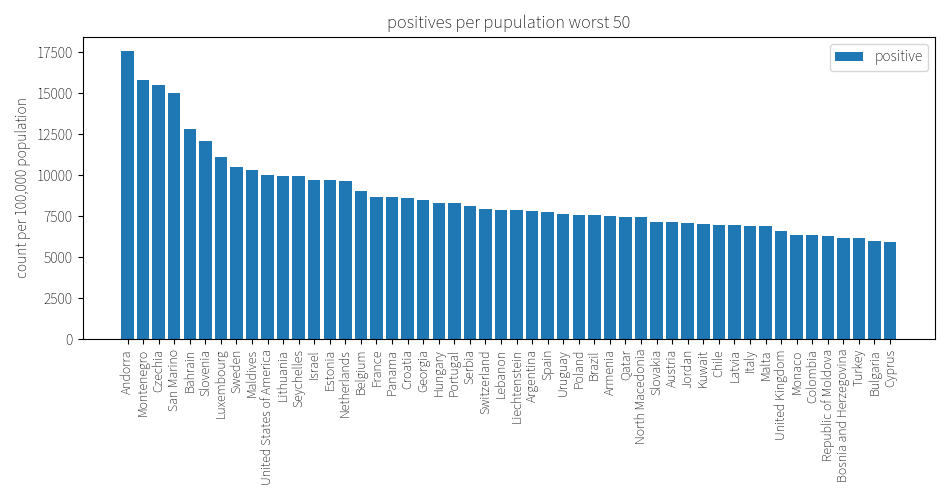

In [30]:
plt.figure(figsize=(9.5,5))
plt.title("positives per pupulation worst 50")
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("count per 100,000 population")
#fig.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.bar(c_merged.head(50)["Country/Region"],c_merged.head(50)["positives per 100,000 population"],label="positive")
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


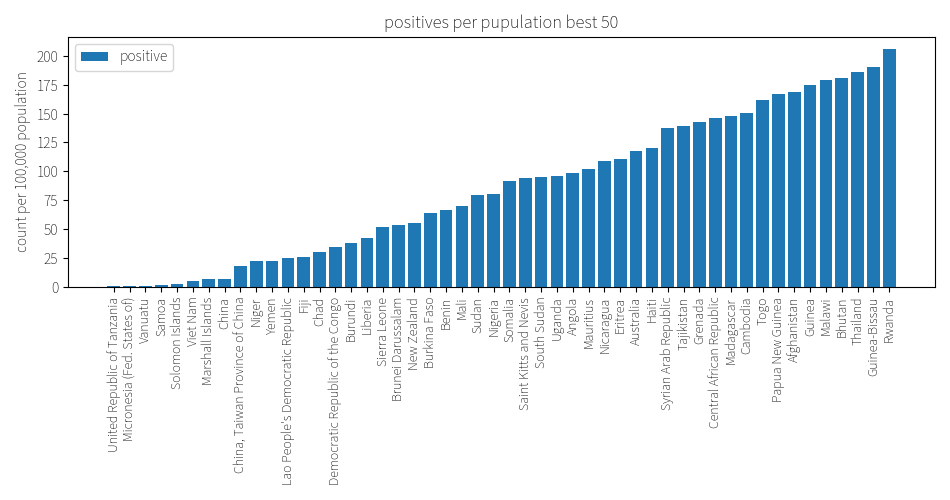

In [31]:
c_asc = c_merged.sort_values("positives per 1000 population")
plt.figure(figsize=(9.5,5))
plt.title("positives per pupulation best 50")
plt.xticks(rotation="90",fontsize=9)
plt.ylabel("count per 100,000 population")
#fig.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.bar(c_asc.head(50)["Country/Region"],c_asc.head(50)["positives per 100,000 population"],label="positive")
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


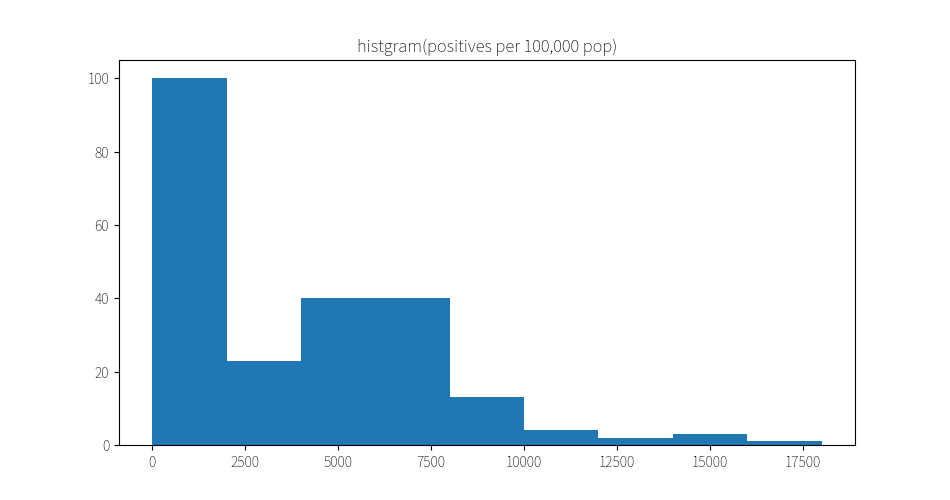

(array([100.,  23.,  40.,  13.,   4.,   2.,   3.,   1.]),
 array([    0,  2000,  4000,  8000, 10000, 12000, 14000, 16000, 18000]),
 <a list of 8 Patch objects>)

In [32]:
plt.figure(figsize=(9.5,5))
plt.title("histgram(positives per 100,000 pop)")
plt.hist(c_merged["positives per 100,000 population"],bins=[0,2000,4000,8000,10000,12000,14000,16000,18000])

In [33]:
c_merged.describe()

,latest_confirmed,"positives per 100,000 population"
count,1.920000e+02,186.000000
mean,8.690732e+05,3316.635545
std,3.362595e+06,3831.365284
min,1.000000e+00,0.852108
25%,1.145600e+04,181.878096
50%,9.603550e+04,1619.673561
75%,3.890772e+05,6181.435861
max,3.311774e+07,17561.638517


In [34]:
c_merged.head()

,Country/Region,latest_confirmed,country,population,positives per 1000 population,"positives per 100,000 population"
136,Andorra,13569,Andorra,77.265,175.616385,17561.638517
94,Montenegro,99248,Montenegro,628.062,158.022616,15802.261560
18,Czechia,1657893,Czechia,10708.982,154.813315,15481.331465
158,San Marino,5087,San Marino,33.938,149.890978,14989.097767
73,Bahrain,218047,Bahrain,1701.583,128.143617,12814.361686


In [35]:
c_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 136 to 187
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country/Region                    192 non-null    object 
 1   latest_confirmed                  192 non-null    int64  
 2   country                           186 non-null    object 
 3   population                        186 non-null    object 
 4   positives per 1000 population     186 non-null    object 
 5   positives per 100,000 population  186 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ KB


<IPython.core.display.Javascript object>


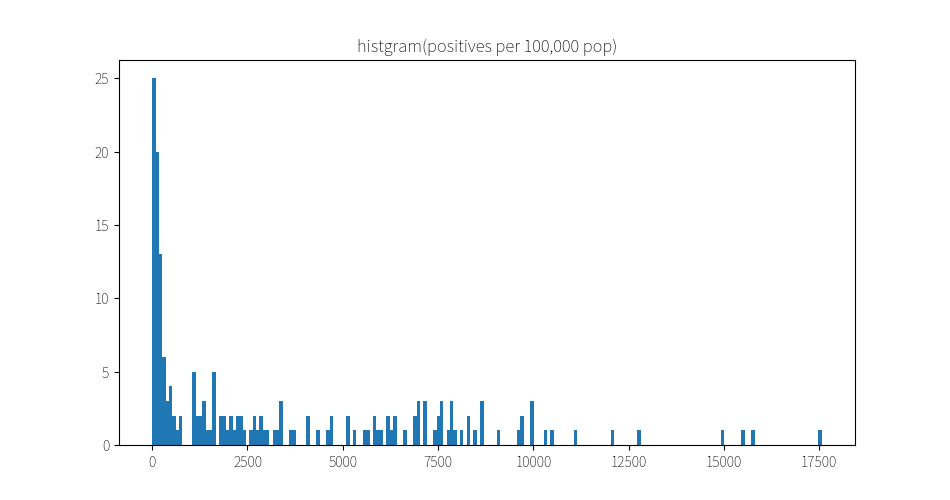

/home/masaru/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/masaru/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([25., 20., 13.,  6.,  3.,  4.,  2.,  1.,  2.,  0.,  0.,  0.,  5.,
         2.,  2.,  3.,  1.,  1.,  5.,  0.,  2.,  2.,  1.,  2.,  1.,  2.,
         2.,  1.,  0.,  1.,  2.,  1.,  2.,  1.,  1.,  0.,  1.,  1.,  3.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,
         1.,  2.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  1.,  1.,
         0.,  2.,  1.,  1.,  0.,  2.,  1.,  2.,  0.,  0.,  1.,  0.,  0.,
         2.,  3.,  0.,  3.,  0.,  0.,  1.,  2.,  3.,  0.,  1.,  3.,  1.,
         0.,  1.,  0.,  2.,  0.,  1.,  0.,  3.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  3.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.

In [36]:
plt.figure(figsize=(9.5,5))
plt.title("histgram(positives per 100,000 pop)")
plt.hist(c_merged["positives per 100,000 population"],bins=200)